In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [2]:
merged_df = pd.read_csv('../../data/education/education_data.csv')
# merged_df.head(), merged_df.shape, merged_df.columns.unique()

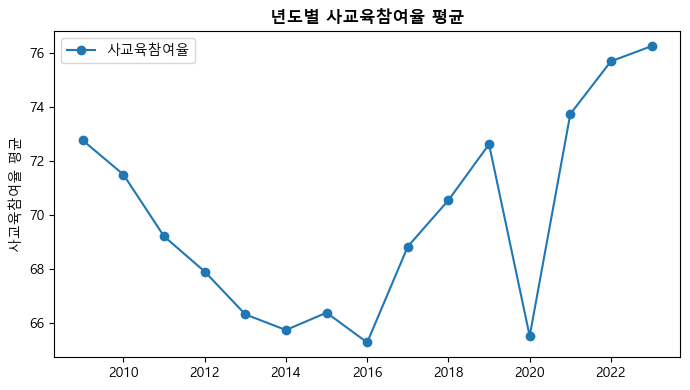

In [3]:
# 년도별 사교육참여율 시각화
numeric_columns = ['사교육참여율']

for col in numeric_columns:
    non_numeric = merged_df[col].apply(lambda x: isinstance(x, str))
    if non_numeric.any():
        print(f"Non-numeric values in {col}:")
        print(merged_df[non_numeric][col])

for col in numeric_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

merged_df.dropna(subset=numeric_columns, inplace=True)
average_data = merged_df.groupby('시점')[numeric_columns].mean().reset_index()

plt.figure(figsize=(7, 4))
plt.plot(average_data['시점'], average_data['사교육참여율'], label='사교육참여율', marker='o')

plt.title('년도별 사교육참여율 평균', fontweight='bold')
plt.ylabel('사교육참여율 평균')
plt.legend()

plt.tight_layout()
plt.show()

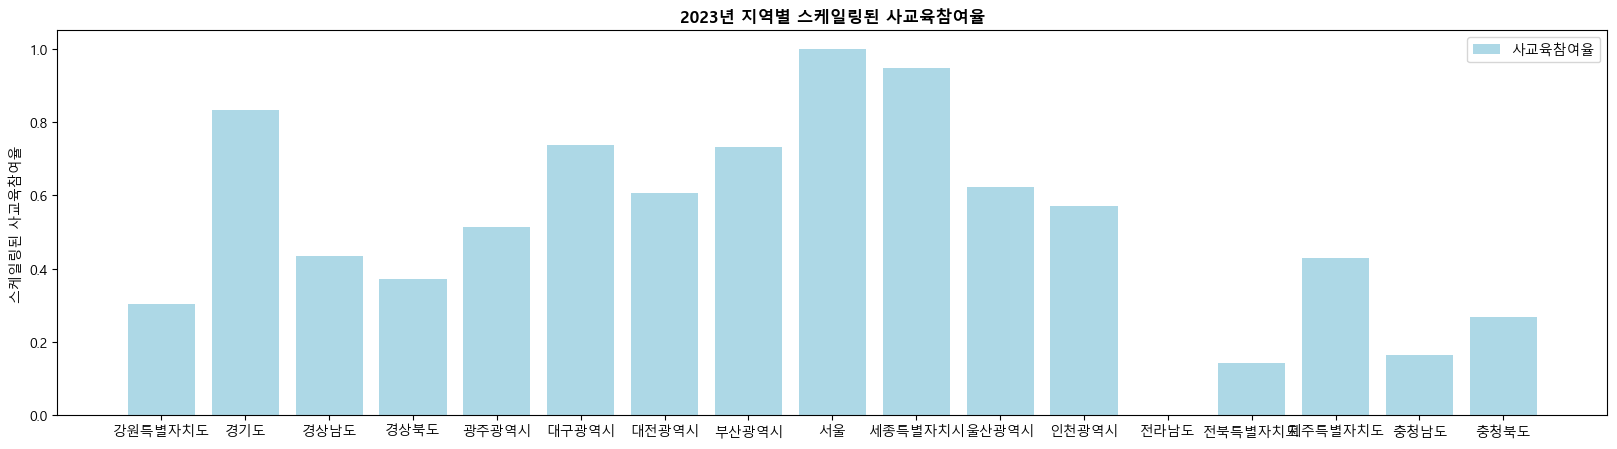

In [4]:
# 지역별 사교육참여율 시각화
data_2023 = merged_df[merged_df['시점'] == 2023].copy()

scaler = MinMaxScaler()
data_2023.loc[:, ['사교육참여율']] = scaler.fit_transform(data_2023[['사교육참여율']])
# print(data_2023[['지역별', '사교육참여율']])

fig, ax1 = plt.subplots(figsize=(20, 5))

ax1.bar(data_2023['지역별'], data_2023['사교육참여율'], color='lightblue', label='사교육참여율')
ax1.set_ylabel('스케일링된 사교육참여율')
ax1.tick_params(axis='y')

plt.title('2023년 지역별 스케일링된 사교육참여율', fontweight='bold')
ax1.legend(loc='upper right')

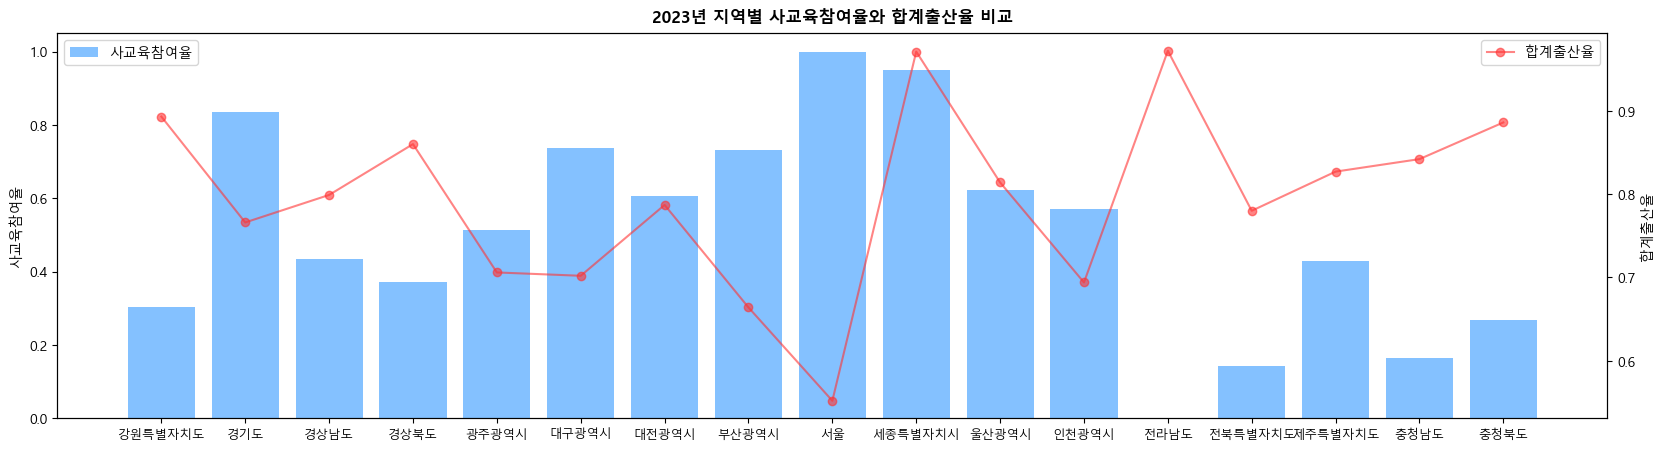

In [5]:
# 지역별 사설학원수 vs 합계출산율
data_2023['합계출산율'] = pd.to_numeric(data_2023['합계출산율'], errors='coerce')
fertility_data = data_2023.groupby('지역별')['합계출산율'].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(20, 5))

ax1.bar(data_2023['지역별'], data_2023['사교육참여율'], color=(0.2, 0.6, 1.0, 0.6), label='사교육참여율')
ax1.set_ylabel('사교육참여율', fontsize=10)
ax1.set_title('2023년 지역별 사교육참여율와 합계출산율 비교', pad=8, fontweight='bold')
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xticks(range(len(data_2023['지역별'])))
ax1.set_xticklabels(data_2023['지역별'], fontsize=9)

ax2 = ax1.twinx()
ax2.plot(fertility_data['지역별'], fertility_data['합계출산율'], color=(1.0, 0.2, 0.2, 0.6), marker='o', label='합계출산율')
ax2.set_ylabel('합계출산율', fontsize=10)
ax2.tick_params(axis='y', labelsize=10)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')